In [1]:
# import numpy as np
# import pandas as pd
# from tensorflow import keras
# import datetime
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import regularizers
# import matplotlib.pyplot as plt
# import cv2
# from autocorrect import spell

# import tensorflow as tf
# tf.compat.v1.losses.sparse_softmax_cross_entropy 
# import PIL
# from PIL import ImageDraw

In [20]:
# from PIL import Image
# import pytesseract

# # Set the path to the Tesseract executable (update this path based on your installation)
# pytesseract.pytesseract.tesseract_cmd=r"C:\Users\rajat.n_elxer\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"


# # Load the image
# image_path = 'text.jpeg'  # Provide the path to your image
# image = Image.open(image_path)

# # Use pytesseract to perform OCR and get character boxes
# custom_config = r'--oem 3 --psm 6 outputbase digits'  # Adjust OCR configuration as needed
# boxes = pytesseract.image_to_boxes(image, config=custom_config)

# # Draw bounding boxes on the image
# image_with_boxes = image.copy()
# draw = ImageDraw.Draw(image_with_boxes)
# for box in boxes.splitlines():
#     box = box.split()
#     x, y, w, h = map(int, box[1:5])
#     draw.rectangle([x, y, w, h], outline="red", width=2)

# # Save or display the image with character boxes
# image_with_boxes.save('image_with_boxes.png')
# image_with_boxes.show()


In [ ]:
# im=PIL.Image.open(r"text.jpeg")
# im



#Spell check

In [ ]:
# def correct_sentence(line):
#     lines = line.strip().split(' ')
#     new_line = ""
#     similar_word = {}
#     for l in lines:
#         new_line += spell(l) + " "
#     # similar_word[l]=spell.candidates(l)
#     return new_line

In [ ]:
# model = Sequential()

In [ ]:
# model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=36, activation='softmax'))

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

In [ ]:
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define constants
# IMAGE_HEIGHT, IMAGE_WIDTH = 32, 128
# BATCH_SIZE = 32
# EPOCHS = 10

# # Function to preprocess the image and label
# def preprocess_data(image_path, label):
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
#     image = image / 255.0
#     label = [char_to_num[char] for char in label]
#     return image, label

# # Load the IAM dataset (adjust the paths accordingly)
# data_path = 'E:\iam hand data\data'
# image_paths = [os.path.join(data_path, 'lines', 'lines', line) for line in os.listdir(os.path.join(data_path, 'lines', 'lines'))]
# labels = [line.split(' ')[-1].strip() for line in open(os.path.join(data_path, 'ascii', 'lines.txt')).readlines()]

# # Map characters to numbers
# char_to_num = {char: num for num, char in enumerate("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~ ")}

# # Create a dataset
# dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
# dataset = dataset.map(preprocess_data)

# # Build the CRNN model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.RepeatVector(128))
# model.add(layers.LSTM(64, return_sequences=True))
# model.add(layers.Dense(len(char_to_num)+1, activation='softmax'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train_size = int(0.9 * len(image_paths))
# val_size = len(image_paths) - train_size

# train_dataset = dataset.take(train_size)
# val_dataset = dataset.skip(train_size)

# # Batch and prefetch the datasets
# train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
# val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# # Train the model
# model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

# # Save the trained model
# model.save('crnn_model.h5')

In [ ]:
# import os
# import cv2
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Function to load and preprocess images
# def load_and_preprocess_data(data_path, img_size=(64, 64)):
#     images = []
#     labels = []

#     for folder in os.listdir(data_path):
#         label = folder
#         folder_path = os.path.join(data_path, folder)

#         for file in os.listdir(folder_path):
#             image_path = os.path.join(folder_path, file)
#             img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#             img = cv2.resize(img, img_size)
#             images.append(img)
#             labels.append(label)

#     images = np.array(images) / 255.0
#     labels = np.array(labels)

#     # Encode labels
#     label_encoder = LabelEncoder()
#     labels = label_encoder.fit_transform(labels)

#     return images, labels, label_encoder

# # Load and preprocess the data
# data_path = 'E:\dataset\data\training_data'
# images, labels, label_encoder = load_and_preprocess_data(data_path)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # Build the CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Save the trained model
# model.save('handwritten_text_model.h5')

# # Convert handwritten text to text
# def recognize_handwritten_text(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (64, 64)) / 255.0
#     img = np.expand_dims(img, axis=0)
#     prediction = model.predict(img)
#     predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
#     return predicted_label

# # Example: Recognize handwritten text from an image
# image_path = 'E:\dataset\data\testing_data\R\43227.png'
# predicted_text = recognize_handwritten_text(image_path)
# print(f"Predicted Text: {predicted_text}")


In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pytesseract
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

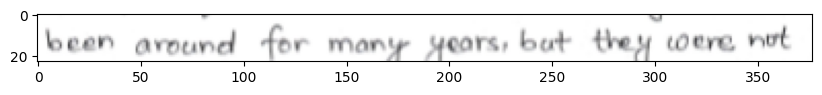

In [7]:
img=mpimg.imread('E:\self_lines\selfMade_126.png')
plt.figure(figsize=(10,10))
plt.imshow(img, cmap ='gray')

In [9]:
img=cv2.imread('E:\self_lines\selfMade_126.png')
text = pytesseract.image_to_string(img)
print(text)

been around for many years, but they were not



In [ ]:
img=mpimg.imread('a04-031-00-00.png')
plt.figure(figsize=(10,10))
plt.imshow(img, cmap ='gray')

In [11]:
img=cv2.imread('a04-031-00-00.png')
pytesseract.pytesseract.tesseract_cmd=r"C:\Users\rajat.n_elxer\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(img)
print(text)

(se BO] Soe

